In [19]:
from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import reuters
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ["KMP_DUPLICATE_LIB_OK"]='1'

In [2]:
(X_train, y_train),(X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

In [3]:
print(np.max(y_train)+1)

46


In [4]:
print(len(X_train))

8982


In [5]:
print(len(X_test))

2246


In [6]:
print(len(X_train[0]))

87


In [10]:
X_train=sequence.pad_sequences(X_train, maxlen=100)
X_test=sequence.pad_sequences(X_test, maxlen=100)

In [11]:
print(y_train[:5])

[3 4 3 4 4]


In [12]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [13]:
print(y_train[:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [14]:
model=models.Sequential()
model.add(layers.Embedding(1000,100))
model.add(layers.LSTM(100,activation='tanh'))
model.add(layers.Dense(46,activation='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         100000    
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 46)                4646      
                                                                 
Total params: 185,046
Trainable params: 185,046
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(loss='categorical_crossentropy',optimizer='adam',
             metrics=['accuracy'])
early_stopping=EarlyStopping(monitor='val_loss',patience=5)

In [18]:
history=model.fit(X_train, y_train, batch_size=20, epochs=20,
                  validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/20
450/450 [==============================] - 18s 34ms/step - loss: 2.2154 - accuracy: 0.4300 - val_loss: 2.3080 - val_accuracy: 0.3678
Epoch 2/20
450/450 [==============================] - 15s 32ms/step - loss: 1.8512 - accuracy: 0.5210 - val_loss: 1.7619 - val_accuracy: 0.5463
Epoch 3/20
450/450 [==============================] - 14s 32ms/step - loss: 1.6536 - accuracy: 0.5804 - val_loss: 1.7107 - val_accuracy: 0.5606
Epoch 4/20
450/450 [==============================] - 14s 32ms/step - loss: 1.5289 - accuracy: 0.6139 - val_loss: 1.5228 - val_accuracy: 0.6135
Epoch 5/20
450/450 [==============================] - 15s 32ms/step - loss: 1.3734 - accuracy: 0.6520 - val_loss: 1.4463 - val_accuracy: 0.6273
Epoch 6/20
450/450 [==============================] - 15s 32ms/step - loss: 1.2499 - accuracy: 0.6831 - val_loss: 1.3176 - val_accuracy: 0.6572
Epoch 7/20
450/450 [==============================] - 15s 32ms/step - loss: 1.1602 - accuracy: 0.7077 - val_loss: 1.2674 - val_accuracy:

In [22]:
print('Test Accuracy: %.4f' %(model.evaluate(X_test, y_test)[1]))

71/71 [==============================] - 1s 12ms/step - loss: 1.2351 - accuracy: 0.7244
Test Accuracy: 0.7244


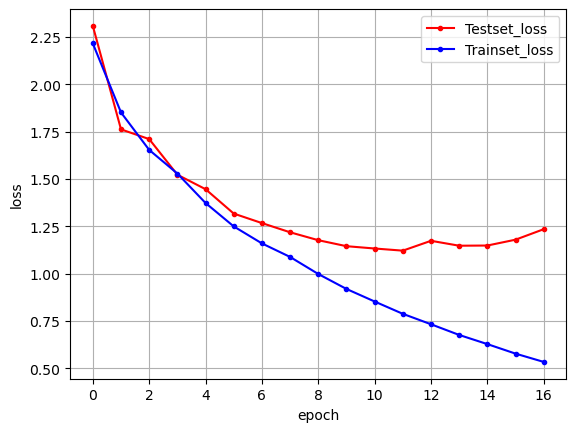

In [23]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 보겠습니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시하겠습니다. 
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()